# Handwritten Digit Recognition with Deep Learning

In this hands-on exercise we are going to learn to use Convolutional Neural Networks (CNN) to recognize handwritten digits. 

The tools we are going to use for this exericse are :

* **Tensorflow** - an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.


* **Keras** - a heavyweight wrapper for Tensorflow. It’s minimalistic, modular, and awesome for rapid experimentation. This is our favorite Python library for deep learning and the best place to start for beginners.


* **Google CoLab** - an implementation of the widely used open-source Jupyter Notebook that has most popular libraries used for machine learning already preinstalled. Its a perfect tool for rapid prototyping and experimentation.


# Step 1 - Import libraries and modules

In [1]:
import keras
# Import the sequential model, which is a linear stack of layers
from keras.models import Sequential
# Import the core layers that are used in almost any neural netwrok
from keras.layers import Dense, Dropout, Flatten
# Import the Convulotional Layers
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


# Step 2 - Import the MNIST dataset

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image. Each image is a **28 by 28** pixel square (**784** pixels total).

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

Lets load the data and visualize some of the images:

11493376/11490434 [==============================] - 1s 0us/step


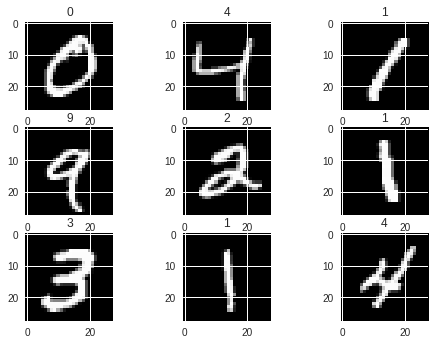

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

for i in range(1,10):
    plt.subplot(330 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])
    
plt.show()

# Step 3 - Preprocess input data and class label for Keras

The next step is to prepare our data for input into the CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [width][height][pixels]. 

In the case of RGB, the first dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

It is also a good idea to normalize the pixel values to the range 0 and 1 and one hot encode the output variables.

In [3]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

print('Dimensions of the training dataset:', X_train.shape)
print('Number of training samples:', X_train.shape[0])
print('Number of test samples: ',X_test.shape[0])

# one hot encode outputs
num_classes = 10;
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
num_classes = y_test.shape[1]

print('Dimensions of the training labels:', y_train.shape)

Dimensions of the training dataset: (60000, 28, 28, 1)
Number of training samples: 60000
Number of test samples:  10000
Dimensions of the training labels: (60000, 10)


# Step 4 - Design model architecture

In [4]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________
None

# Step 5 - Compile and fit the model

In order to compile the model we need to select a loss function and an optimizer. Keras offer a wide selection and you can find more information here: 

* Loss functions : https://keras.io/losses/
* Optimizers: https://keras.io/optimizers/

Before we are ready to fit our model we need to select two more parameters, batch size and number of epochs.

* **Batch size** : defines the number of samples that will be propagated through the network. Advantages of using a batch size smaller that your total samples is memory usage and efficiency in training.

* **Epochs** : The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch.


In [5]:
#@title Fit parameters

batch_size = 200 #@param {type:"slider", min:100, max:1000, step:10}
epochs = 15 #@param {type: "slider", min: 1, max: 20}

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2425 - acc: 0.9320 - val_loss: 0.0764 - val_acc: 0.9782
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0762 - acc: 0.9772 - val_loss: 0.0524 - val_acc: 0.9828
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0542 - acc: 0.9833 - val_loss: 0.0413 - val_acc: 0.9844
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0427 - acc: 0.9866 - val_loss: 0.0375 - val_acc: 0.9872
Epoch 5/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0350 - acc: 0.9889 - val_loss: 0.0342 - val_acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0307 - acc: 0.9898 - val_loss: 0.0311 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0251 - acc: 0.9920 - val_loss: 0.0311 - val_ac

# Step  6 - Evaluation and visualization of results

Test loss: 0.03674507585648098
Test accuracy: 0.9886


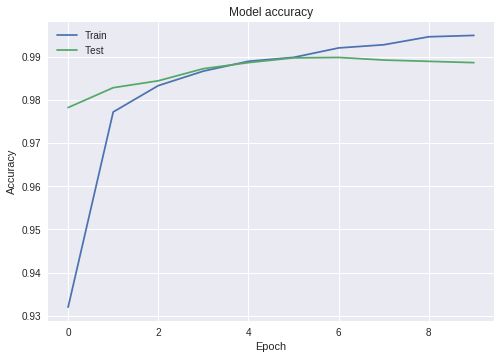

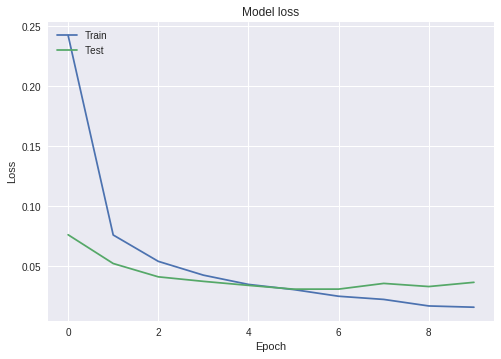

In [6]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()